## 1

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [11]:
def moneta(n):
    lanci = 0
    for i in range(n):
        lanci += random.randint(0,1)
    perc = (lanci/n)*100
    return(perc)

In [20]:
campione = [random.randint(10, 20000) for _ in range(100)]
a = []
for c in campione:
    a.append(moneta(c))
a[:10]

[49.83210208193418,
 48.148148148148145,
 49.25856485426964,
 49.97157152604048,
 49.58893383792248,
 50.58151980021406,
 50.182841068917014,
 49.48633586248573,
 50.93659942363112,
 49.601500234411624]

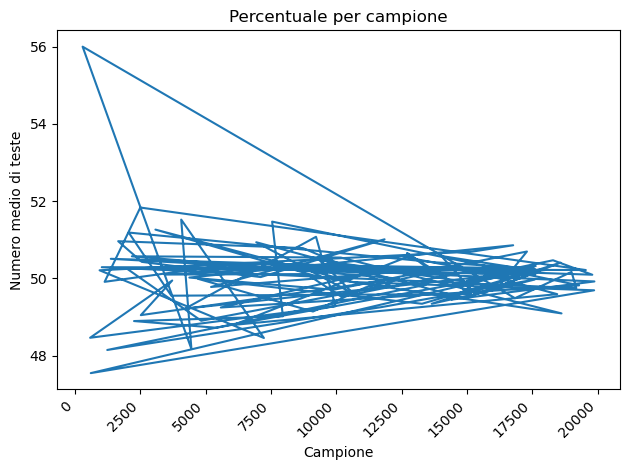

In [21]:
plt.plot(campione, a)

plt.ylabel("Numero medio di teste")
plt.xlabel("Campione")
plt.title("Percentuale per campione")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.shape

(891, 12)

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isna().sum()

0

In [24]:
df.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) 
medie = df.groupby('Pclass')['Age'].mean()
medie

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

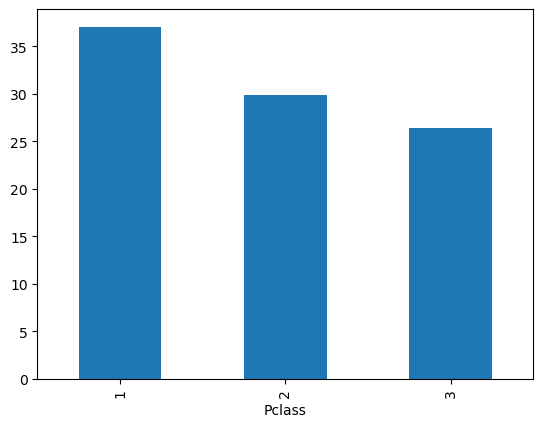

In [27]:
medie.plot(kind='bar')

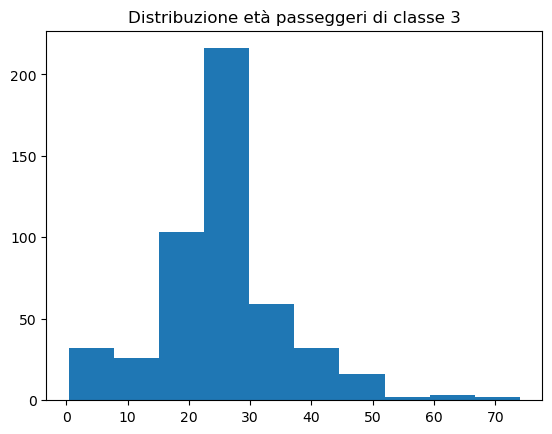

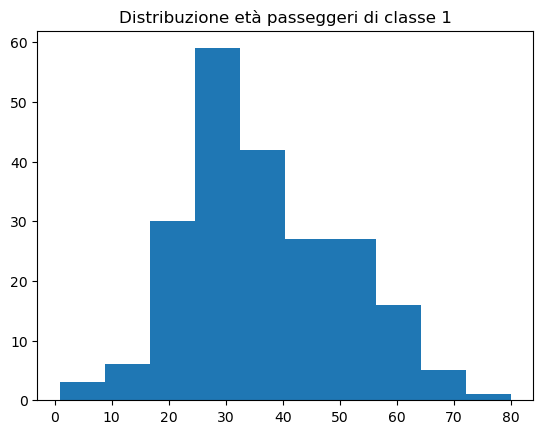

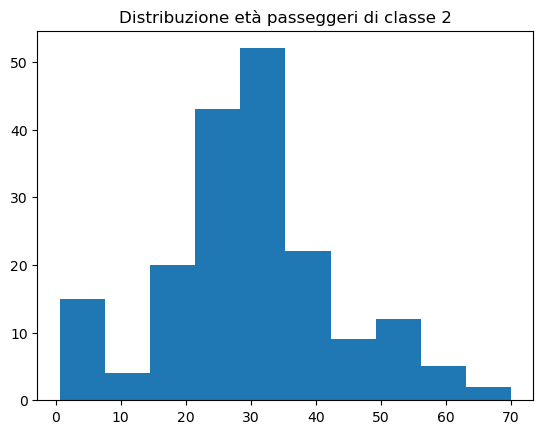

In [28]:
for el in df['Pclass'].unique():
    plt.hist(df[df['Pclass'] == el]['Age'])
    plt.title(f'Distribuzione età passeggeri di classe {el}')
    plt.show()


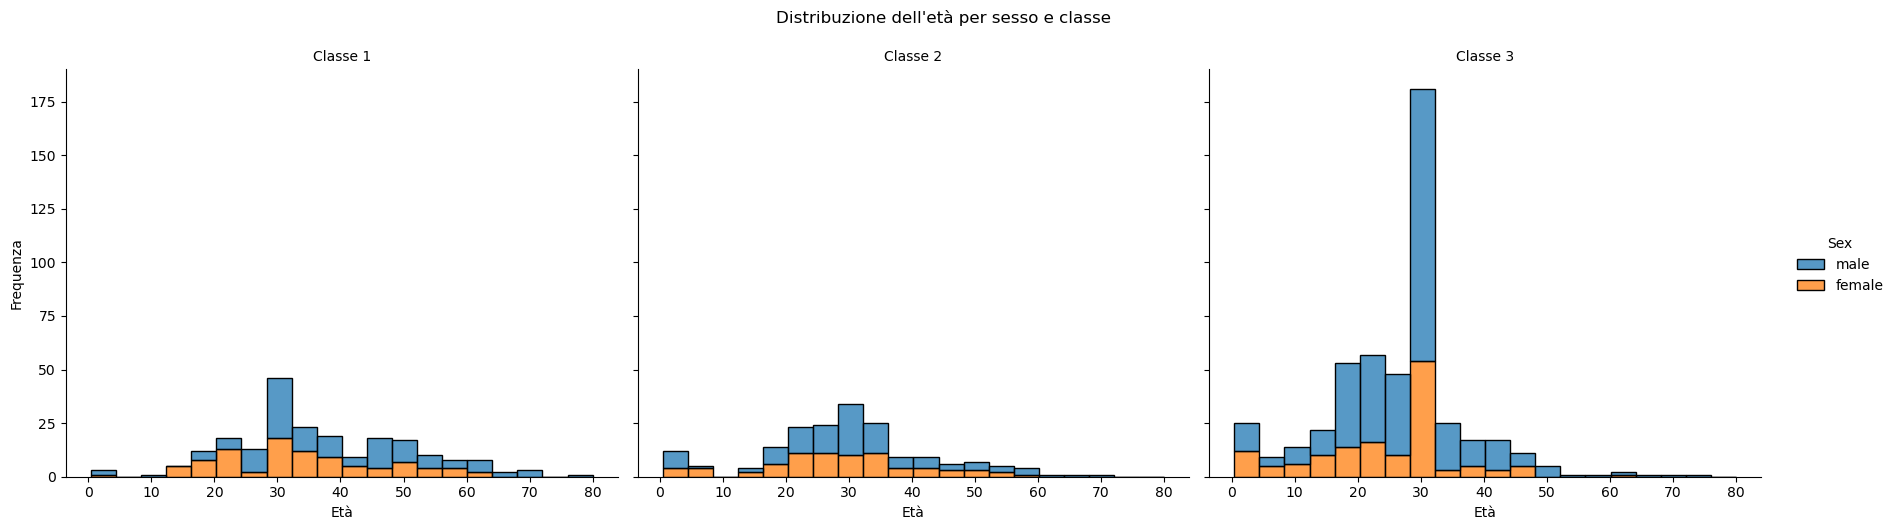

In [30]:
g = sns.displot(
    data=df,
    x='Age',
    hue='Sex',
    col='Pclass',
    bins=20,
    multiple='stack',
    height=5,
    aspect=1.2
)

g.set_axis_labels("Età", "Frequenza")
g.set_titles("Classe {col_name}")
g.figure.suptitle("Distribuzione dell'età per sesso e classe", y=1.05)
plt.show()

## 3

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [34]:
medie_len = df.groupby('species')['petal_length'].mean()
medie_wid = df.groupby('species')['petal_width'].mean()

medie_len, medie_wid

(species
 setosa        1.462
 versicolor    4.260
 virginica     5.552
 Name: petal_length, dtype: float64,
 species
 setosa        0.246
 versicolor    1.326
 virginica     2.026
 Name: petal_width, dtype: float64)

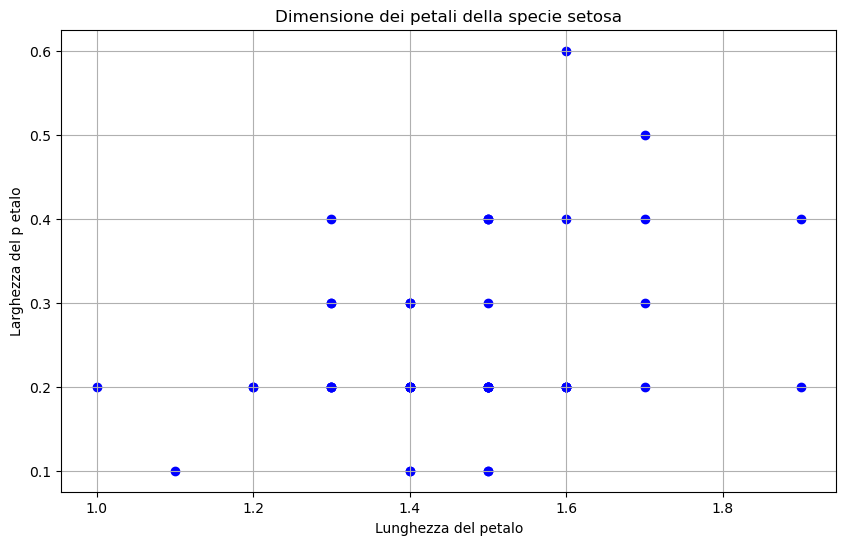

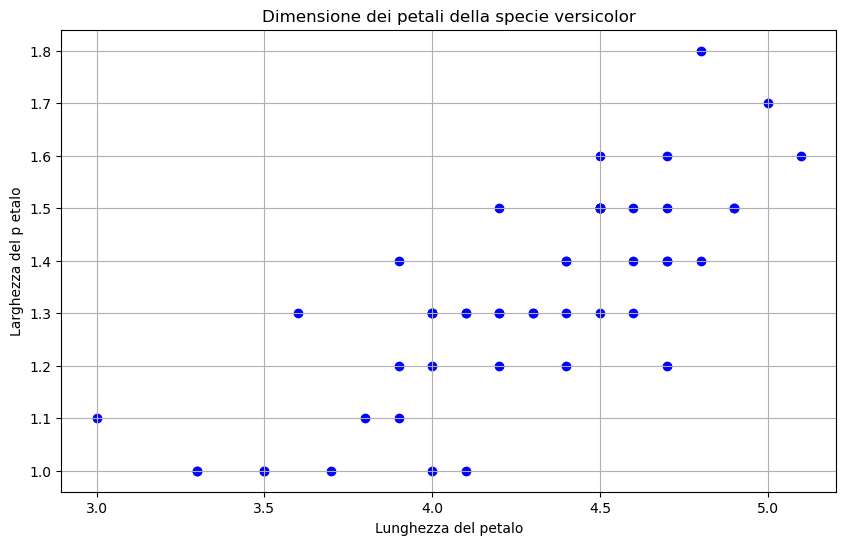

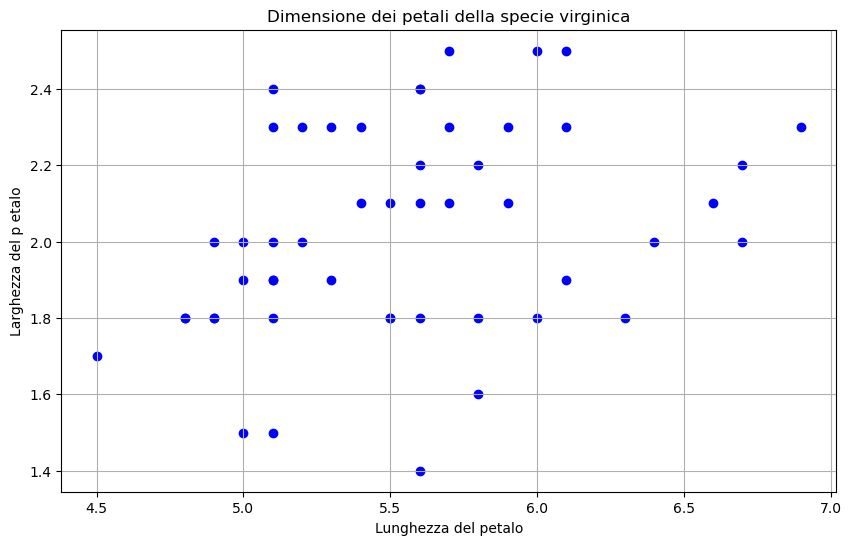

In [35]:
for el in df['species'].unique():
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['species']==el]['petal_length'], df[df['species']==el]['petal_width'], color='blue')
    plt.title(f'Dimensione dei petali della specie {el}')
    plt.xlabel('Lunghezza del petalo')
    plt.ylabel('Larghezza del p etalo')
    plt.grid(True)  
    plt.show()

In [36]:
df['petal_area'] = df['petal_length']*df['petal_width']

In [37]:
df['petal_area'].describe()

count    150.000000
mean       5.794067
std        4.712390
min        0.110000
25%        0.420000
50%        5.615000
75%        9.690000
max       15.870000
Name: petal_area, dtype: float64

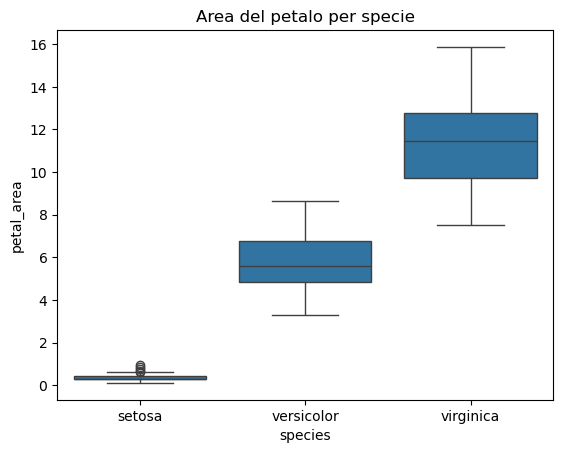

In [38]:
sns.boxplot(data=df, x="species", y='petal_area')
plt.title('Area del petalo per specie')
plt.show()